<a href="https://colab.research.google.com/github/Amitsrma/Faces-In-Wild/blob/master/Relation_identification_from_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
This code is a part of solution attempt from me to check if we can know if two
people are related based on their images
Training and testing data is provided by kaggle.
Following is the link to competition: https://www.kaggle.com/c/recognizing-faces-in-the-wild/overview
'''
from google.colab import drive
drive.mount('/colab/')

Drive already mounted at /colab/; to attempt to forcibly remount, call drive.mount("/colab/", force_remount=True).


In [0]:
!ls /colab/

'My Drive'


In [0]:
!ls "My Drive"

ls: cannot access 'My Drive': No such file or directory


In [0]:
!ls '/colab/My Drive/Colab_folder'

dogs-cats  FIW


In [0]:
!ls '/colab/My Drive/Colab_folder/FIW'

Relation_identification_from_face.ipynb  test.zip		  train.zip
sample_submission.csv			 train
test					 train_relationships.csv


In [0]:
##Run this part only once
#import zipfile
##this does not work for nested folders .i.e. if there is folder in folder in 
##folder in the zip file
#zip_ref = zipfile.ZipFile("/colab/My Drive/Colab_folder/FIW/train.zip", 'r')
#zip_ref.extractall("/colab/My Drive/Colab_folder/FIW/train/")
#zip_ref.close()

#zip_ref = zipfile.ZipFile("/colab/My Drive/Colab_folder/FIW/test.zip", 'r')
#zip_ref.extractall("/colab/My Drive/Colab_folder/FIW/test/")
#zip_ref.close()

In [0]:
##run this part only once
##this worked for nested folder
#!unzip '/colab/My Drive/Colab_folder/FIW/train.zip' -d '/colab/My Drive/Colab_folder/FIW/train/'

In [0]:
import os
import shutil
from random import shuffle
from tqdm import tqdm_notebook
def organize_datasets(path_to_data, n=4000, ratio=0.2):
    files = os.listdir(path_to_data)
    files = [os.path.join(path_to_data, f) for f in files]
    shuffle(files)
    files = files[:n]
    
    n = int(len(files) * ratio)
    val, train = files[:n], files[n:]


#    shutil.rmtree('./train/')
#    print('/train/ removed')

#    for c in ['dogs', 'cats']: 
#        os.makedirs('/colab/My Drive/Colab_folder/train/{0}/'.format(c))
#        os.makedirs('/colab/My Drive/Colab_folder/validation/{0}/'.format(c))

#    print('folders created !')

    for t in tqdm_notebook(train):
        if 'cat' in t:
            shutil.copy2(t, os.path.join('My Drive', 'Colab_folder','train'))
        else:
            shutil.copy2(t, os.path.join('My Drive', 'Colab_folder', 'train'))
     
    for v in tqdm_notebook(val):
        if 'cat' in v:
            shutil.copy2(v, os.path.join('My Drive', 'Colab_folder', 'validation'))
        else:
            shutil.copy2(v, os.path.join('My Drive', 'Colab_folder', 'validation'))
            
    print('Data copied!')

In [0]:
import pandas as pd
!ls '/colab/My Drive/Colab_folder/FIW/'

Relation_identification_from_face.ipynb  test.zip		  train.zip
sample_submission.csv			 train
test					 train_relationships.csv


In [0]:
train_reln=pd.read_csv('/colab/My Drive/Colab_folder/FIW/train_relationships.csv')
print(train_reln.head())
print(train_reln.iloc[0,0])
print(type(train_reln.iloc[0,0]))

           p1          p2
0  F0002/MID1  F0002/MID3
1  F0002/MID2  F0002/MID3
2  F0005/MID1  F0005/MID2
3  F0005/MID3  F0005/MID2
4  F0009/MID1  F0009/MID4
F0002/MID1
<class 'str'>


In [0]:
a=!ls '/colab/My Drive/Colab_folder/FIW/train/F0002/MID1'

In [0]:
a

['P00009_face3.jpg  P00012_face2.jpg  P00015_face2.jpg  P00018_face1.jpg',
 'P00010_face4.jpg  P00013_face2.jpg  P00016_face2.jpg',
 'P00011_face1.jpg  P00014_face2.jpg  P00017_face3.jpg']

In [0]:
len(train_reln)

3598

In [0]:
!ls '/colab/My Drive/Colab_folder/FIW/train/F0009/MID1'

P00089_face3.jpg  P11719_face1.jpg  P11732_face1.jpg  P11745_face1.jpg
P10569_face2.jpg  P11720_face3.jpg  P11733_face4.jpg  P11748_face1.jpg
P10570_face5.jpg  P11721_face5.jpg  P11734_face1.jpg  P11749_face1.jpg
P10571_face4.jpg  P11722_face2.jpg  P11735_face1.jpg  P11750_face1.jpg
P10572_face2.jpg  P11723_face2.jpg  P11736_face2.jpg  P11752_face1.jpg
P10574_face1.jpg  P11724_face4.jpg  P11737_face6.jpg  P11753_face1.jpg
P10575_face6.jpg  P11725_face1.jpg  P11738_face3.jpg  P11755_face2.jpg
P10576_face2.jpg  P11726_face4.jpg  P11740_face1.jpg  P11757_face3.jpg
P10577_face3.jpg  P11727_face3.jpg  P11741_face3.jpg
P10588_face2.jpg  P11728_face2.jpg  P11742_face1.jpg
P11714_face1.jpg  P11730_face1.jpg  P11744_face6.jpg


In [0]:
import os
size1, size2, prev1, prev2=0,0,0,0
total_matrix_size=0
notExistingFolder={}
for i in train_reln.index:
  #checks if the folder checking relationship exists in the train folder
  try:
    size1=len(os.listdir('/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[i,'p1']))
    if size1>prev1:
      prev1=size1
  except FileNotFoundError:
    #if folder doesnot exist, it is added in a list that keeps track of all the folders that do not exist
    if i not in notExistingFolder.keys():
      notExistingFolder[i]=[train_reln.loc[i,'p1'],]
    else:
      notExistingFolder[i].append(train_reln.loc[i,'p1'])
  try:
    size2=len(os.listdir('/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[i,'p2']))
    total_matrix_size+=size1*size2
    if size2>prev2:
      prev2=size2
  except FileNotFoundError:
    if i not in notExistingFolder.keys():
      notExistingFolder[i]=[train_reln.loc[i,'p2'],]
    else:
      notExistingFolder[i].append(train_reln.loc[i,'p2'])
print(prev1, prev2)

95 95


In [0]:
notExistingFolder.keys()

dict_keys([128, 131, 132, 133, 145, 146, 147, 160, 161, 162, 199, 201, 204, 205, 206, 207, 223, 224, 225, 233, 237, 239, 240, 420, 421, 422, 423, 427, 428, 429, 430, 431, 432, 434, 442, 444, 471, 472, 473, 474, 475, 525, 532, 704, 709, 722, 732, 734, 743, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 794, 795, 816, 817, 827, 829, 831, 839, 844, 845, 846, 847, 848, 881, 882, 883, 886, 887, 889, 890, 891, 892, 896, 897, 918, 919, 922, 933, 941, 943, 946, 947, 951, 962, 970, 1073, 1077, 1078, 1080, 1108, 1115, 1116, 1118, 1122, 1123, 1125, 1262, 1264, 1266, 1268, 1270, 1382, 1384, 1387, 1390, 1392, 1448, 1458, 1490, 1516, 1518, 1519, 1554, 1555, 1556, 1557, 1558, 1566, 1571, 1577, 1581, 1586, 1601, 1605, 1606, 1608, 1609, 1613, 1614, 1688, 1689, 1705, 1706, 1722, 1723, 1724, 1725, 1726, 1728, 1798, 1799, 1876, 1878, 1880, 1937, 1939, 2006, 2007, 2070, 2108, 2161, 2164, 2168, 2265, 2269, 2271, 2272, 2273, 2274, 2276, 2277, 2315, 2317, 2360, 2361, 2384, 2430, 2431, 2483, 2499, 2500, 251

In [0]:
'''
This part is used to remove the parts of dataframe which points to folder that
do not exist.
'''

for key in notExistingFolder.keys():
  train_reln=train_reln.drop(key)


In [0]:
total_matrix_size

167785

In [0]:
len(train_reln)-len(notExistingFolder),len(train_reln)

(3367, 3598)

In [0]:
'''
Creating a dataframe with a columns having information about images that are related
related_dataframe: dataframe that stores information about image
Column: Image-1: stores numpy array of number representing an image
Column: Image-2: stores numpy array of number representing an image related to Image-1
'''
import matplotlib.pyplot as plt
import numpy as np
import keras


In [0]:
a=plt.imread('/colab/My Drive/Colab_folder/FIW/train/F0009/MID1/P00089_face3.jpg')
len(a), len(a[0]), len(a[0][0]), (a[0][0])

(224, 224, 3, array([130, 110,  85], dtype=uint8))

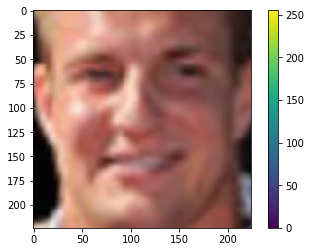

In [0]:
plt.imshow(a)
plt.colorbar()

In [0]:
a=a/255.0

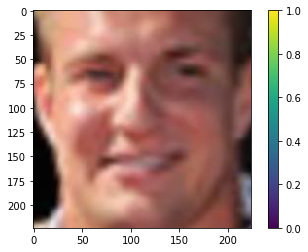

In [0]:
plt.imshow(a)
plt.colorbar()

In [0]:
image_=[]
for i in range(len(a)):
  image_.append(np.concatenate(a[i]))

In [0]:
a.shape
#Done!

(224, 224, 3)

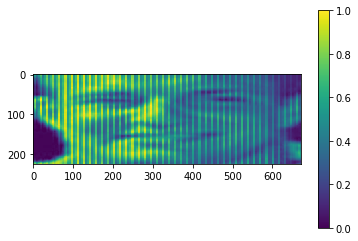

In [0]:
plt.imshow(np.array(image_))
plt.colorbar()

In [0]:
len(image_[0])

672

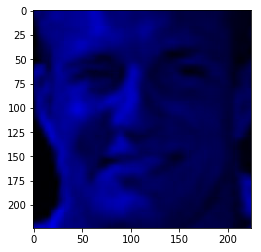

In [0]:
black=np.array(a)
for i in range(len(black)):
  for j in range(len(black[i])):
    for k in range(len(black[i][j])-1):
      black[i][j][k]=0
plt.imshow(black)

In [0]:
print(len(black), len(black[0]))
print(black[0][0])

224 224
[0.         0.         0.33333333]


In [0]:
!ls '/colab/My Drive/Colab_folder/FIW/train/F0009/MID1'

P00089_face3.jpg  P11719_face1.jpg  P11732_face1.jpg  P11745_face1.jpg
P10569_face2.jpg  P11720_face3.jpg  P11733_face4.jpg  P11748_face1.jpg
P10570_face5.jpg  P11721_face5.jpg  P11734_face1.jpg  P11749_face1.jpg
P10571_face4.jpg  P11722_face2.jpg  P11735_face1.jpg  P11750_face1.jpg
P10572_face2.jpg  P11723_face2.jpg  P11736_face2.jpg  P11752_face1.jpg
P10574_face1.jpg  P11724_face4.jpg  P11737_face6.jpg  P11753_face1.jpg
P10575_face6.jpg  P11725_face1.jpg  P11738_face3.jpg  P11755_face2.jpg
P10576_face2.jpg  P11726_face4.jpg  P11740_face1.jpg  P11757_face3.jpg
P10577_face3.jpg  P11727_face3.jpg  P11741_face3.jpg
P10588_face2.jpg  P11728_face2.jpg  P11742_face1.jpg
P11714_face1.jpg  P11730_face1.jpg  P11744_face6.jpg


In [0]:
a=plt.imread('/colab/My Drive/Colab_folder/FIW/train/F0009/MID1/P10576_face2.jpg')

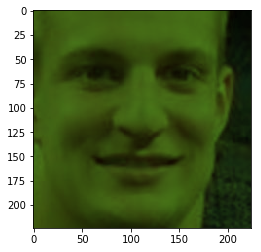

In [0]:
black=np.array(a/255.0)
for i in range(len(black)):
  for j in range(len(black[i])):
    black[i][j]*= np.array([0.299, 0.587, 0.144])
plt.imshow(black)

In [0]:
train_reln.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


In [0]:
128 in train_reln.index #checking if I had removed the erroneous entries

False

In [0]:
train_reln.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


In [0]:
'''
creating database of related images
'''
#the dataframe acting as database
import pandas as pd
import os
import matplotlib.pyplot as plt

related_dataframe=pd.DataFrame(columns=['Image-1','Image-2','relation'])

'''
1. get into each folder that contains image of related people.
2. create all possible permutation of related images.
3. image-1 will be image from column p1.
4. image-2 will be image from column p2.
5. relation will have value 1 when there is relation between the photos.

#train_reln.head()

p1	p2
0	F0002/MID1	F0002/MID3
1	F0002/MID2	F0002/MID3
2	F0005/MID1	F0005/MID2
3	F0005/MID3	F0005/MID2
4	F0009/MID1	F0009/MID4
'''
for indx in train_reln.index:
  #getting location of first folder with related image
  locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p1']
  #getting location of second folder with related image
  locn_p2='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p2']
  
  #getting list of files in first folder
  files_in_p1=os.listdir(locn_p1)
  #getting list of files in second folder
  files_in_p2=os.listdir(locn_p2)
  for image_file_name_p1 in files_in_p1:
    #reading image file in location of p1 and converting it to grey scale
    img1=plt.imread(locn_p1+image_file_name_p1)/255.0 * np.array([0.299, 0.587, 0.144])
    for image_file_name_p2 in files_in_p2:
      #reading image file in location of p1
      img2=plt.imread(locn_p1+image_file_name_p2)/255.0 * np.array([0.299, 0.587, 0.144])
      related_dataframe.loc[indx,'Image-1']=img1
      related_dataframe.loc[indx,'Image-2']=img2
        

In [0]:
locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p1']

In [0]:
files_in_p1=os.listdir(locn_p1)

In [0]:
files_in_p1

['P10581_face1.jpg', 'P10580_face1.jpg']